<a href="https://colab.research.google.com/github/Veronika2311/prozhito_test/blob/main/NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прожито

Возьмите дамп «прожито»:

https://www.dropbox.com/sh/8vfjjt8107sv9r3/AADOVR795M..

Выберите из него небольшой когерентный кусочек при помощи тулзы для работы с дампом (https://github.com/kilomeow/prozhito-tools)

Особенно интересно выбрать кусок максимально удаленный от сегодня или с по какой-то причине непохожим на сегодняшний интернет языком

Расскажите коротко, почему вы выбрали такой кусок

Разметьте его каким-то готовым NER решением

Предложите подход к оценке и анализу полученной разметки. Чего вы ждёте от неё, какие машина допустила ошибки, как их может показаться можным исправить. Почему современный NER допускает такие ошибки? Что вы вообще думаете об этом и смежном?

Если вдруг успеете, сделайте часть такого анализа.

## Отрывок

Теггеры обучаются на разных данных, но в основном "из коробки" их целью не является разметка именно дневниковых записей (или же кхудожественной литературы). Наташа, к примеру, обучена на корпусе новостей. Соответственно, при разметке дневников может появиться сразу несколько проблем. 
1. Язык и синтаксис другой эпохи (в Прожито, и даже в нашем отрывке есть дневники с 17го века).
2. Нетипичные сокращения и обозначения людей и мест буквально в ннесколько букв (а также разные обозначения одного и того же человека)
3. Вышедшие из употребления названия, имена и аббревиатуры

Поэтому подобрать ровно одну запись так, чтобы в ней проявлялись все эти отличительные черты, довольно сложно. Но можно, вероятно, взять несколько небольших отрывков с интересующими нас чертами и посмротреть на то, как они будут размечены.

In [16]:
TEXT1 = '''Позавчера я сдал все дела и снова стал работать рядовым контролером. Заходил в ЭРО. Там мне выписали командировку в Москву, Житомир и Борисполь. 
Но когда я стал разговаривать с нач-ком ОТК, он своего согласия не дал. Я его все два дня уговорить пытался. А причина этому опять та, что Кравец остался за парторга 
цеха, а я буду снова за старшего, но в другой смене. Не хочется, но ничего не сделаешь.    
Черт с ним! Лишь бы мне только отпуск в сентябре вырвать, да на пароходе скататься. И дом суметь перед отпуском отремонтировать.'''

In [ ]:
TEXT2 = '''Я купила себе шёлковый шарфик для шубы и с нетерпением ждала вечера, хотя, в то же время, боялась, что Конст. Хр. будет со мной скучать. О чём я буду с ним говорить? 
Приехав домой из техникума, я стала торопливо собираться, т. к. времени осталось мало; погладила платье, сделала маникюр, причесалась и, вдруг, звонок. 
Шура пошёл открывать – это был Аджемов, он пришёл, чтобы предупредить меня, что вместо 20-го, ему удалось достать билеты на 28-е, а на сегодняшний вечер он взял билеты на «Бедную невесту» Островского. 
Я спешно пообедала, одела моё меховое манто, шарфик и шляпу, а так же свои перчатки с крагами (которые я вышила накануне ночью, так, что они вышли очень нарядными и элегантными, и приняли совсем дорогой вид). И, наконец, мы вышли. Аджемов был очень мил и внимателен. 
Мы доехали до Никитской пл., затем пересели на другой трамвай, причём К. Х. хотел, т. к. времени было много, обязательно пройтись пешком. Мы встали у Зоопарка и, пройдя мимо пруда, на котором каталась Кити Толстого, пошли к Краснопресненской заставе. 
К. Х. знал только приблизительно, где помещается театр, а я не знала вовсе, поэтому мы свернули раньше, чем следовало и попали в какие-то пустыри. Погода была тёплая и тихая, хотя уже начало подмораживать. 
Под ногами скрипел, недавно выпавший, снег. Луна, то закрывалась облаками, то появлялась вновь. Всё было тихо и безлюдно.'''

In [14]:
TEXT3 = '''Божиею милостью Великого Государя, Царя и Великого Князя, Василия Ивановича, всей Руси Самодержца, Владимирского, 
Московского, Новгородского, Царя Казанского, Царя Астраханского, Царя Сибирского, Государя Псковского и Великого Князя 
Смоленского, Болгарского и иных, Государя и Великого Князя Новагорода Низовской земли, Черниговского, Рязанского, 
Ростовского, Ярославского, Белозерского, Удорского, Обдорского, Кондийского и всей Северной страны Повелителя, 
Государя Северской земли, Карталинских и Грузинских Царей и Кабардинской земли, Черкасских и Горских Князей и иных 
многих государств Государя и Обладателя, Его Царского Величества от старшины и воеводы и наместника Смоленского, 
Михаила Борисовича Шеина, в Оршу, Оршанскому старосте Андрею Ивановичу Сапеге. Августа 22 дня писал ты ко мне в листе 
своем с посланными своими, с Павликом Полежоным, что Государь ваш, Король Сигизмунд, приехал в Оршу и чтобы мне уведомить 
тебя о своевольных людях Государя вашего, учинивших обиды везде на границе Смоленской. И я неоднократно прежде сего писал 
к тебе, когда у Великого Государя нашего Царя и Великого Князя, Василия Ивановича, всей Русии Самодержца, в Москве, 
были послы вашего Короля, Николай Олесницкий и Александр Гонсевский и гонцы Станислав Витовский и Князь Ян Соколинский, 
и постановили между Великим Государем вашим, Королем Сигизмундом, и между их великими Государствами союз и мир, утвердив 
его союзными грамотами и крестным целованием на том*,* чтобы в перемирное время разрыва и войны никому не начинать, а 
которые люди Государя вашего в государстве нашего Государя, с панами и ротмистрами и со множеством Польских и Литовских 
людей, опустошают вместе с Самозванцем земли Государя нашего и проливают Христианскую кровь, и всех бы тех людей, по 
общему согласию, из государств Великого Государя нашего вашему Государю, Королю Сигизмунду, вывести, и впредь, в перемирные 
годы, не пропускать никого военным обычаем из Государств вашего Государя, и обманщиков, которые изменнически называют себя 
потомками Великих Государей, не держать и никакого вспомоществования им не оказывать. И после того посольского постановления
и утверждения, Польские и Литовские люди и доныне проливают Христианскую кровь в Государств нашего Государя и опустошают 
земли Государя нашего. А посланных твоих я отправил к тебе, не задерживая. Писано в Великого 
Государя нашего, Его Царского Величества, отчине, в городе Смоленске, 1609 года, Августа 22 дня.'''

### Natasha

Наташа -- наверное, первое, что могло бы прийти в голову при мысли о распознавании именных сущностей для русского языка. Легче и быстрее, чем DeepPavlov, но при этом не слишком сильно должна уступать ему в точности как минимум на новостных корпусах. Стандартная трёхчастная разметка человек-место-организация, что, с одной сстороны, неплохо для стандартного определения точности, с другой -- часто у именованных сущностей более сложная структура, например, должность + имя или упоминание организации и нескольких её подразделений, которые тоже являются организациями (например, ФиКЛ ФГН НИУ ВШЭ). С третьей -- дата и время, если нам нужны и они тоже, никак не могут быть распознаны с помощью этой библиотеки.

Поэтому можно предположить, что в некоторых случаях разметка может разбить одно длинное наименование на несколько или недоразметить слово из этого наименования, как это было в примерах в документации.

In [10]:
!pip install natasha

In [11]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

In [12]:
def natasha_result(TEXT):
      doc = Doc(TEXT)
      doc.segment(segmenter)
      doc.tag_ner(ner_tagger)
      display(doc.spans[:5])
      doc.ner.print()

In [15]:
natasha_result(TEXT)

[DocSpan(start=58, stop=75, type='PER', text='Василия Ивановича', tokens=[...]),
 DocSpan(start=82, stop=86, type='LOC', text='Руси', tokens=[...]),
 DocSpan(start=87, stop=97, type='PER', text='Самодержца', tokens=[...]),
 DocSpan(start=99, stop=112, type='ORG', text='Владимирского', tokens=[...]),
 DocSpan(start=115, stop=126, type='ORG', text='Московского', tokens=[...])]

Божиею милостью Великого Государя, Царя и Великого Князя, Василия 
                                                          PER─────
Ивановича, всей Руси Самодержца, Владимирского, 
─────────       LOC─ PER───────  ORG──────────  
Московского, Новгородского, Царя Казанского, Царя Астраханского, Царя 
ORG────────  LOC──────────  PER────────────  PER───────────────       
Сибирского, Государя Псковского и Великого Князя 
            PER────────────────                  
Смоленского, Болгарского и иных, Государя и Великого Князя Новагорода 
             LOC────────                                              
Низовской земли, Черниговского, Рязанского, 
                 LOC──────────  LOC───────  
Ростовского, Ярославского, Белозерского, Удорского, Обдорского, 
LOC────────  LOC─────────  LOC─────────  LOC──────  LOC───────  
Кондийского и всей Северной страны Повелителя, 
LOC────────        LOC──────────── LOC───────  
Государя Северской земли, Карталинских и Грузинских Царей и 
PER────

### PullEnti

С одной стороны, много тегов. И нужных, и не очень нужных именно для дневниковых записей. Однако если просмотреть их бегло, то понятно, что записи в дневниках попадаются самой разной структуры, и где-то могли бы встретится, к примеру, телефоны. Однако в большей степени многие теги, возможно, если бы не были лишними здесь, то по крайней мере не являлись бы наиболее необходимыми. При этом плюсом данного разметчика является то, что кроме отдельных сущностей, он определяет и отношения между ними, так, что это не просто географический объект, но у него есть тип, и к этому же объекту првязываются разные именования одного и того же объекта, что может быть преимуществом и сделать разметку более удобной. 

In [30]:
!pip install pullenti-wrapper
!pip install graphviz

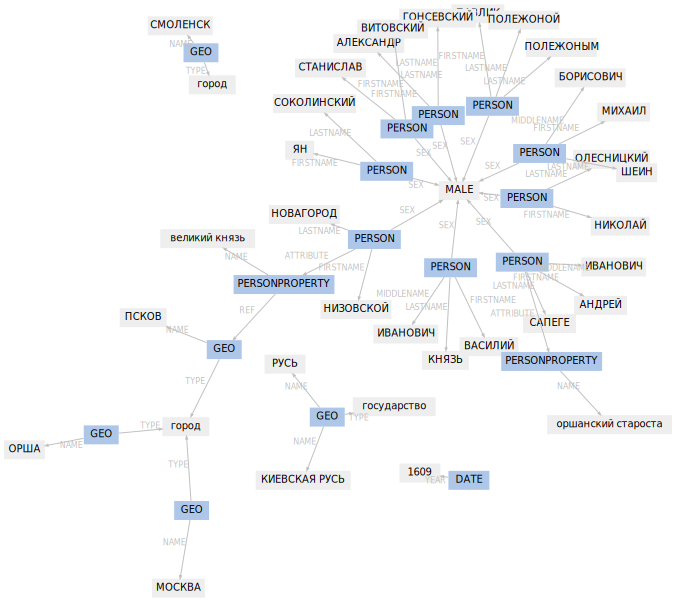

In [31]:
from pullenti_wrapper.processor import (
    Processor,
    MONEY,
    URI,
    PHONE,
    DATE,
    KEYWORD,
    DEFINITION,
    DENOMINATION,
    MEASURE,
    BANK,
    GEO,
    ADDRESS,
    ORGANIZATION,
    PERSON,
    MAIL,
    TRANSPORT,
    DECREE,
    INSTRUMENT,
    TITLEPAGE,
    BOOKLINK,
    BUSINESS,
    NAMEDENTITY,
    WEAPON,
)

processor = Processor([PERSON, ORGANIZATION, GEO, DATE, MONEY])

In [18]:
def pullenty_result(TEXT):
    text = TEXT
    result = processor(text)
    result.graph

In [19]:
pullenty_result(TEXT)

NameError: ignored

### Stanza

For packages with 4 named entity types, supported types include PER (Person), LOC (Location), ORG (Organization) and MISC (Miscellaneous).

Всего четыре тега, три из них стандартны, и этого мало, если мы хотим кроме людей, мест и организаций, выделять ещё дату и время, к примеру. Однако из плюсов здесь есть выделение всего прочего в отдельную категорию. 

In [32]:
!pip install stanza

In [33]:
import stanza
stanza.download('ru')
def stanza_nlp_ru(text):
  nlp = stanza.Pipeline(lang='ru', processors='tokenize,ner')
  doc = nlp(text)
  print(*[f'entity: {ent.text}\ttype: {ent.type}' for sent in doc.sentences for ent in sent.ents], sep='\n')
stanza_nlp_ru(TEXT)

2020-11-19 19:56:37 INFO: Downloading default packages for language: ru (Russian)...
2020-11-19 19:56:49 INFO: File exists: /root/stanza_resources/ru/default.zip.
2020-11-19 19:56:56 INFO: Finished downloading models and saved to /root/stanza_resources.
2020-11-19 19:56:56 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| ner       | wikiner   |

2020-11-19 19:56:56 INFO: Use device: cpu
2020-11-19 19:56:56 INFO: Loading: tokenize
2020-11-19 19:56:56 INFO: Loading: ner
2020-11-19 19:56:58 INFO: Done loading processors!


entity: Великого Государя	type: PER
entity: Царя	type: PER
entity: Великого Князя	type: PER
entity: Василия Ивановича	type: PER
entity: Руси Самодержца	type: PER
entity: Владимирского	type: PER
entity: Московского	type: MISC
entity: Новгородского	type: MISC
entity: Царя Казанского	type: PER
entity: Царя Астраханского	type: PER
entity: Царя Сибирского	type: PER
entity: Государя Псковского	type: PER
entity: Великого Князя 
Смоленского	type: LOC
entity: Государя	type: PER
entity: Великого Князя Новагорода	type: LOC
entity: Низовской земли	type: LOC
entity: Черниговского	type: MISC
entity: Рязанского	type: MISC
entity: Ростовского	type: MISC
entity: Ярославского	type: MISC
entity: Белозерского	type: LOC
entity: Удорского	type: LOC
entity: Обдорского	type: LOC
entity: Кондийского	type: LOC
entity: Северной страны	type: LOC
entity: Повелителя	type: PER
entity: Государя	type: PER
entity: Карталинских	type: LOC
entity: Грузинских Царей	type: LOC
entity: Кабардинской земли	type: LOC
entity: Чер

### Polyglot

Полиглот также размечает не так много категорий, если посмотреть на примеры, делает это не всегда логично. Лицензия не позволяет использование в коммерческих проектах. В целом кажется не идеальным вариантом для решения именно этой ззадачи.

In [34]:
!pip3 install -U git+https://github.com/aboSamoor/polyglot.git@master
!polyglot download embeddings2.ru ner2.ru
from polyglot.text import Text

  Cloning https://github.com/aboSamoor/polyglot.git (to revision master) to /tmp/pip-req-build-bg35paoo
  Running command git clone -q https://github.com/aboSamoor/polyglot.git /tmp/pip-req-build-bg35paoo
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=70644 sha256=b359c126294a850e0282f515c12c9fea3acb6746f186006f252e6640d81aee0a
  Stored in directory: /tmp/pip-ephem-wheel-cache-qyxaszh_/wheels/42/d9/73/345c7ae8554299ff8b31635d64eb8455fd591385fa734cdbef
Successfully built polyglot
  Found existing installation: polyglot 16.7.4
    Uninstalling polyglot-16.7.4:
      Successfully uninstalled polyglot-16.7.4


[polyglot_data] Downloading package embeddings2.ru to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package embeddings2.ru is already up-to-date!
[polyglot_data] Downloading package ner2.ru to /root/polyglot_data...
[polyglot_data]   Package ner2.ru is already up-to-date!


In [35]:
def polyglot(TEXT):
    for ent in Text(TEXT).entities:
        print(ent[0],ent.tag)

Великого I-PER
Великого I-PER
Василия I-PER
Руси I-LOC
Владимирского I-LOC
Казанского I-PER
Сибирского I-PER
Псковского I-PER
Смоленского I-PER
Болгарского I-LOC
Новагорода I-PER
Удорского I-LOC
Обдорского I-LOC
Северной I-LOC
Михаила I-PER
Оршу I-LOC
Андрею I-PER
Августа I-PER
Павликом I-PER
Сигизмунд I-PER
Оршу I-LOC
Смоленской I-LOC
Великого I-PER
Великого I-PER
Василия I-PER
Москве I-LOC
Николай I-PER
Александр I-PER
Станислав I-PER
Ян I-PER
вашим I-PER
Королем I-PER
Великого I-PER
Королю I-PER
Великих I-LOC
Андрей I-PER
Королю I-PER
Раде I-PER
Раде I-ORG
Сигизмунд I-PER
перемирное I-LOC
целованию I-PER
крестному I-PER
Государями I-LOC
Польских I-PER
обманщиком I-PER
А I-PER
Писано I-PER
Великого I-PER
Смоленске I-LOC
Августа I-PER


### DeepPavlov

Одно из известных "тяжёлых" решений на трансформерах, которое представляется создателями как более академическое и исследовательское, чем как коммерческое. Из плюсов также открытый исходный код.

In [3]:
#!pip3 install deeppavlov
#!python3 -m deeppavlov install ner_ontonotes
#!python -m deeppavlov install ner_ontonotes_bert

2020-11-19 20:04:42.398 INFO in 'deeppavlov.core.common.file'['file'] at line 32: Interpreting 'ner_ontonotes' as '/usr/local/lib/python3.6/dist-packages/deeppavlov/configs/ner/ner_ontonotes.json'
2020-11-19 20:04:49.896 INFO in 'deeppavlov.core.common.file'['file'] at line 32: Interpreting 'ner_ontonotes_bert' as '/usr/local/lib/python3.6/dist-packages/deeppavlov/configs/ner/ner_ontonotes_bert.json'
  Cloning https://github.com/deepmipt/bert.git (to revision feat/multi_gpu) to /tmp/pip-req-build-ovp3i_g1
  Running command git clone -q https://github.com/deepmipt/bert.git /tmp/pip-req-build-ovp3i_g1
  Created wheel for bert-dp: filename=bert_dp-1.0-cp36-none-any.whl size=23581 sha256=29f448dc45b4e98c7672865ce2695d1d1ecc91462b8c14d888cc6baa43e18fa2
  Stored in directory: /tmp/pip-ephem-wheel-cache-hwq1imay/wheels/1e/41/94/886107eaf932532594886fd8bfc9cb9d4db632e94add49d326
Successfully built bert-dp


In [1]:
from deeppavlov import configs, build_model

ner_model = build_model(configs.ner.ner_rus_bert, download=True)
result = ner_model([TEXT])
for i in range(len(result[0][0])):
     if result [1][0][i] != 'O':
        print(result[0][0][i], result[1][0][i])

2020-11-19 20:10:11.302 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/bert/rubert_cased_L-12_H-768_A-12_v1.tar.gz download because of matching hashes
2020-11-19 20:10:38.241 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/ner_rus_bert_v1.tar.gz download because of matching hashes
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


2020-11-19 20:10:45.631 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 115: [loading vocabulary from /root/.deeppavlov/models/ner_rus_bert/tag.dict]











The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API



Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use stan

2020-11-19 20:11:16.343 INFO in 'deeppavlov.core.models.tf_model'['tf_model'] at line 51: [loading model from /root/.deeppavlov/models/ner_rus_bert/model]



INFO:tensorflow:Restoring parameters from /root/.deeppavlov/models/ner_rus_bert/model


NameError: ignored

In [7]:
result = ner_model([TEXT])
for i in range(len(result[0][0])):
     if result [1][0][i] != 'O':
        print(result[0][0][i], result[1][0][i])

Василия B-PER
Ивановича I-PER
Руси B-LOC
Московского B-LOC
Новгородского B-LOC
Смоленского B-LOC
Болгарского B-LOC
Низовской B-LOC
земли I-LOC
Черниговского B-LOC
Рязанского B-LOC
Ростовского B-LOC
Ярославского B-LOC
Белозерского B-LOC
Удорского B-LOC
Обдорского B-LOC
Кондийского B-LOC
Северной B-LOC
страны I-LOC
Северской B-LOC
земли I-LOC
Карталинских B-LOC
Грузинских B-LOC
Кабардинской B-LOC
земли I-LOC
Черкасских B-LOC
Горских B-LOC
Князей I-LOC
Смоленского B-LOC
Михаила B-PER
Борисовича I-PER
Шеина I-PER
Оршу B-LOC
Оршанскому B-LOC
Андрею B-PER
Ивановичу I-PER
Сапеге I-PER
Павликом B-PER
Полежоным I-PER
Сигизмунд B-PER
Оршу B-LOC
Смоленской B-LOC
Василия B-PER
Ивановича I-PER
Русии B-LOC
Москве B-LOC
Николай B-PER
Олесницкий I-PER
Александр B-PER
Гонсевский I-PER
Станислав B-PER
Витовский I-PER
Ян B-PER
Соколинский I-PER


## Accuracy 



## Итоги